In [775]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [776]:
# Load the companies and rounds data 
# companies = pd.read_csv("/Users/anurag/Desktop/Investment_assignments/companies.csv")

In [777]:
# Chardet: The Universal Character Encoding Detector (ASCII, UTF-8, UTF-16, UTF-32,Big5, GB2312, EUC-TW, HZ-GB-2312 etc)
import chardet

In [778]:
# with open("/Users/anurag/Desktop/Investment_assignments/companies.csv", 'rb') as rawdata:
#     result = chardet.detect(rawdata.read())

# # check what the character encoding might be
# print(result)

In [779]:
companies = pd.read_csv("/Users/anurag/Desktop/Investment_assignments/companies.csv",encoding='iso8859_9')

In [780]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01/01/10


In [781]:
rounds2 = pd.read_csv("/Users/anurag/Desktop/Investment_assignments/rounds2.csv",encoding='iso8859_9')

In [782]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05/01/15,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14/10/14,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01/03/14,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30/01/14,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19/03/08,2000000.0


# Information on Companies and rounds2 information 

In [783]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


# Information on Companies and rounds2 Descreption - mean , max , median etc 

In [784]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [785]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3959
top,/Organization/Maintag,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01/01/12
freq,1,4,5,3995,53034,37601,12900,8804,3526,2736


In [786]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


# Getting Unique for companies and rounds2

In [787]:
#identify unique companies in round2
len(rounds2['company_permalink'].unique())

90247

In [788]:
#identify unique companies in companies
len(companies['name'].unique())

66100

In [789]:
rounds2['company_permalink'].value_counts()

/ORGANIZATION/SOLARFLARE                      10
/ORGANIZATION/SEMPRIUS                         9
/organization/semprius                         9
/organization/tigo-energy                      9
/organization/vocalocity                       9
                                              ..
/ORGANIZATION/MEDICAL-IMAGING-HOLDINGS         1
/organization/spotzot                          1
/organization/meritbuilder                     1
/ORGANIZATION/DOWN-TO-EARTH-TRANSPORTATION     1
/ORGANIZATION/SIMWORX                          1
Name: company_permalink, Length: 90247, dtype: int64

In [790]:
companies['name'].value_counts()

#NAME?         4
Roost          4
Karma          4
Peach          4
Spire          4
              ..
Promodity      1
CoachMePlus    1
Weblance       1
Stitch Labs    1
Voyantic       1
Name: name, Length: 66099, dtype: int64

In [791]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [792]:
rounds2['company_permalink'].value_counts()

/organization/solarflare               19
/organization/exagen-diagnostics       18
/organization/semprius                 18
/organization/quellan                  18
/organization/endogastric-solutions    17
                                       ..
/organization/proberry                  1
/organization/enrich-in                 1
/organization/hexago                    1
/organization/redsocks                  1
/organization/shopnation                1
Name: company_permalink, Length: 66370, dtype: int64

In [793]:
len(rounds2['company_permalink'].unique())

66370

In [794]:
len(companies['name'].unique())

66100

In [795]:
companies['name'].value_counts(normalize=True)*100

#NAME?         0.006027
Roost          0.006027
Karma          0.006027
Peach          0.006027
Spire          0.006027
                 ...   
Promodity      0.001507
CoachMePlus    0.001507
Weblance       0.001507
Stitch Labs    0.001507
Voyantic       0.001507
Name: name, Length: 66099, dtype: float64

In [796]:
rounds2['company_permalink'].value_counts(normalize=True)*100

/organization/solarflare               0.016529
/organization/exagen-diagnostics       0.015659
/organization/semprius                 0.015659
/organization/quellan                  0.015659
/organization/endogastric-solutions    0.014789
                                         ...   
/organization/proberry                 0.000870
/organization/enrich-in                0.000870
/organization/hexago                   0.000870
/organization/redsocks                 0.000870
/organization/shopnation               0.000870
Name: company_permalink, Length: 66370, dtype: float64

In [797]:
len(companies['permalink'].unique())

66368

In [798]:
len(rounds2['company_permalink'].unique())

66370

In [799]:
#Need to make permalink lowercase in order to have data consistency 
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01/01/10


# Treating missing values in companies and rounds2


In [800]:
# Finding missing values in companies and rounds2
companies_missing_values = companies.isnull().sum()

In [801]:
companies.isnull().mean().round(4) * 100

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

In [802]:
rounds2.isnull().mean().round(4) * 100

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [803]:
companies.isnull().sum() * 100 / len(companies)

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [804]:
rounds2.isnull().sum() * 100 / len(rounds2)

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [805]:
# As funding_round_code column in rounds2 dataframe has very high % of missing value , dropping it
rounds2 = rounds2.drop(['funding_round_code'],axis=1)
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [806]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [807]:
#imputing median values in raised_amound_usd rows
median_rounds2 = rounds2['raised_amount_usd'].median()
rounds2['raised_amount_usd'] = rounds2['raised_amount_usd'].replace(np.nan, median_rounds2)


In [808]:
rounds2.isnull().sum() * 100 / len(rounds2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [809]:
companies.isnull().sum() * 100 / len(companies)

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [810]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14/10/14,1680511.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01/03/14,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30/01/14,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/03/08,2000000.0


In [811]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01/01/10


In [812]:
# Merge rounds2 with companies
master_frame = pd.merge(companies,rounds2,how="inner",left_on="permalink",right_on="company_permalink")
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14/10/14,1680511.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01/03/14,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30/01/14,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/03/08,2000000.0


In [813]:
master_frame = master_frame.drop(["company_permalink"],axis=1)
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14/10/14,1680511.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01/03/14,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30/01/14,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/03/08,2000000.0


In [814]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
dtype: int64

In [815]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [816]:
master_frame.describe()

,raised_amount_usd
count,1.149420e+05
mean,8.906290e+06
std,1.044166e+08
min,0.000000e+00
25%,5.000000e+05
50%,1.680511e+06
75%,5.000000e+06
max,2.127194e+10


# Create dataframes for Venture , Seed , Angel and Private Equity Funding Types

In [817]:
sorted_by_raised_amount_usd = master_frame.sort_values(by="raised_amount_usd",ascending=False)
sorted_by_raised_amount_usd.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
106557,/organization/verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07/10/83,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,28/02/14,2.127194e+10
37567,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01/01/53,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21/10/06,1.760000e+10
16470,/organization/cambridge-technology-group,Cambridge Technology Group,NaN,Consulting|Product Development Services|Produc...,operating,NaN,NaN,NaN,NaN,01/01/88,/funding-round/896482503c37ea60a54dda3cd7a323d6,post_ipo_equity,01/01/00,1.066494e+10
86132,/organization/sberbank,Sberbank,http://www.sberbank.ru,Banking|Finance,ipo,RUS,48,Moscow,Moscow,NaN,/funding-round/a48f63dcba48312b9d3b8e1b21fcdd9f,post_ipo_debt,07/07/14,5.800000e+09
16474,/organization/cambridge-technology-partners-ctp,Cambridge Technology Partners (CTP),NaN,Architecture|Banking|Finance,ipo,NaN,NaN,NaN,NaN,11/01/90,/funding-round/38c4e6a4046032a047be1ef06c28b06e,undisclosed,01/01/01,5.000000e+09


In [818]:
sorted_by_funding_round_type = master_frame.sort_values(by="funding_round_type",ascending=False)
sorted_by_funding_round_type.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0
88046,/organization/serus,Serus,http://www.serus.com,Enterprise Software,acquired,USA,CA,SF Bay Area,Sunnyvale,01/01/00,/funding-round/a98677c158d178fcd6c2f76ca9896981,venture,11/07/07,8000000.0
88044,/organization/serstech,Serstech,http://www.serstech.com,Biotechnology,operating,SWE,27,Malmo,Lund,01/01/06,/funding-round/fcaf5f406f93adafb561d87e07ff5b38,venture,01/06/13,1821193.0
88043,/organization/serraview,Serraview,http://www.serraview.com/,Commercial Real Estate,operating,AUS,7,Melbourne,Melbourne,01/01/06,/funding-round/37703940a27d846b9b07e8064ab2ab19,venture,27/10/14,1680511.0
88040,/organization/serps,SERPs,http://serps.com,SEO|Software,operating,USA,OR,"Portland, Oregon",Portland,01/01/12,/funding-round/4aca8f548bc42b4ac98fee61c19d95d1,venture,23/04/13,50000.0


In [819]:
# Top 5 raised amount
top5_raised_amount = sorted_by_raised_amount_usd[:5]
top5_raised_amount

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
106557,/organization/verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07/10/83,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,28/02/14,2.127194e+10
37567,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01/01/53,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21/10/06,1.760000e+10
16470,/organization/cambridge-technology-group,Cambridge Technology Group,NaN,Consulting|Product Development Services|Produc...,operating,NaN,NaN,NaN,NaN,01/01/88,/funding-round/896482503c37ea60a54dda3cd7a323d6,post_ipo_equity,01/01/00,1.066494e+10
86132,/organization/sberbank,Sberbank,http://www.sberbank.ru,Banking|Finance,ipo,RUS,48,Moscow,Moscow,NaN,/funding-round/a48f63dcba48312b9d3b8e1b21fcdd9f,post_ipo_debt,07/07/14,5.800000e+09
16474,/organization/cambridge-technology-partners-ctp,Cambridge Technology Partners (CTP),NaN,Architecture|Banking|Finance,ipo,NaN,NaN,NaN,NaN,11/01/90,/funding-round/38c4e6a4046032a047be1ef06c28b06e,undisclosed,01/01/01,5.000000e+09


In [820]:
# Filtering for Venture 
venture_fund = master_frame[master_frame['funding_round_type'].str.contains("venture")]
venture_fund.head()



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14/10/14,1680511.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30/01/14,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/03/08,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01/01/10,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24/07/14,1680511.0


In [821]:
#Representative funding amount of venture type
venture_fund.median()

raised_amount_usd    4000000.0
dtype: float64

In [822]:
import seaborn as sns

In [823]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114941 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  funding_round_permalink  114942 non-null  object 
 11  funding_round_type       114942 non-null  object 
 12  funded_at                114942 non-null  object 
 13  raised_amount_usd        114942 non-null  float64
dtypes: f

In [824]:
funding_group = master_frame.groupby("funding_round_type")
funding_group

In [825]:
funding_group.first()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd
funding_round_type,,,,,,,,,,,,,
angel,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,CHN,22,Beijing,Beijing,01/01/08,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,01/04/10,43923865.0
convertible_note,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,Health and Wellness,operating,USA,NJ,Newark,Iselin,01/01/84,/funding-round/9eb8c7790a0c200d79e75785d1c4aa12,02/03/11,1750000.0
debt_financing,/organization/10-20-media,10-20 Media,http://www.10-20media.com,E-Commerce,operating,USA,MD,Baltimore,Woodbine,01/01/01,/funding-round/436874dc54b54460f99f44c06e50990a,11/01/11,800000.0
equity_crowdfunding,/organization/1-4-all,1-4 All,http://www.Homeandcondogallery.com,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,07/12/13,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,21/04/13,1680511.0
grant,/organization/121cast,121cast,http://www.121cast.com,Audio|Mobile|Music,operating,AUS,7,Melbourne,Melbourne,01/02/12,/funding-round/d23f44687b25b1b1aa30a38cb79a4edb,01/05/12,20000.0
non_equity_assistance,/organization/accelerated-pictures,Accelerated Pictures,http://acceleratedpictures.com/,Software,operating,USA,WA,Seattle,Seattle,01/01/09,/funding-round/8becdd8c1c50e40941e07df5d136c500,01/03/15,1680511.0
post_ipo_debt,/organization/3d-systems,3D Systems,http://www.3dsystems.com,Software,ipo,USA,SC,SC - Other,Rock Hill,01/01/86,/funding-round/bdafdb1b27266967e857f9b2cd15cfa6,13/10/14,150000000.0
post_ipo_equity,/organization/21vianet,21viaNet,http://www.ch.21vianet.com,Software|Web Hosting,ipo,CHN,22,Beijing,Beijing,16/10/09,/funding-round/2345a1c69642393c3fdb4fee85d103b3,01/12/12,1680511.0
private_equity,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24/10/13,/funding-round/11c228f58831bc7ed337ef69ecc560c2,01/02/15,6000000.0


angel                         AxesSubplot(0.1,0.736957;0.173913x0.163043)
convertible_note         AxesSubplot(0.308696,0.736957;0.173913x0.163043)
debt_financing           AxesSubplot(0.517391,0.736957;0.173913x0.163043)
equity_crowdfunding      AxesSubplot(0.726087,0.736957;0.173913x0.163043)
grant                         AxesSubplot(0.1,0.541304;0.173913x0.163043)
non_equity_assistance    AxesSubplot(0.308696,0.541304;0.173913x0.163043)
post_ipo_debt            AxesSubplot(0.517391,0.541304;0.173913x0.163043)
post_ipo_equity          AxesSubplot(0.726087,0.541304;0.173913x0.163043)
private_equity                AxesSubplot(0.1,0.345652;0.173913x0.163043)
product_crowdfunding     AxesSubplot(0.308696,0.345652;0.173913x0.163043)
secondary_market         AxesSubplot(0.517391,0.345652;0.173913x0.163043)
seed                     AxesSubplot(0.726087,0.345652;0.173913x0.163043)
undisclosed                       AxesSubplot(0.1,0.15;0.173913x0.163043)
venture                      AxesSubpl

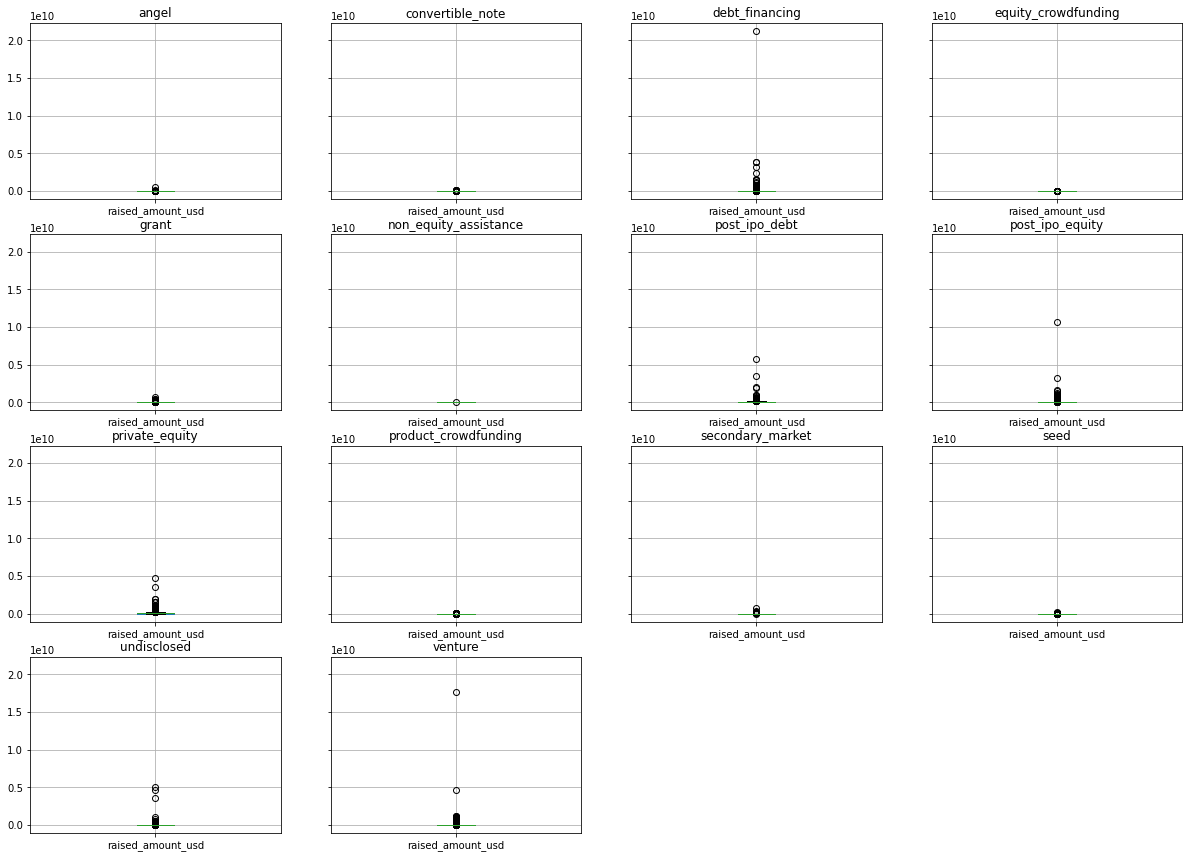

In [826]:
funding_group.boxplot(figsize=(20,15))

In [827]:
venture_df = funding_group.get_group('venture') 
venture_df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,05/01/15,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/22dacff496eb7acb2b901dec1dfe5633,14/10/14,1680511.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,30/01/14,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07,/funding-round/5727accaeaa57461bd22a9bdd945382d,19/03/08,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01/01/10,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,24/07/14,1680511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114927,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,18/10/12,140500.0
114929,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,16/12/04,8500000.0
114930,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01/01/07,/funding-round/0c43e717298296d2fb334fb236300f6e,29/01/13,2686600.0
114934,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/171693e1e07e0230defd8fddb6de4515,01/04/12,1587301.0


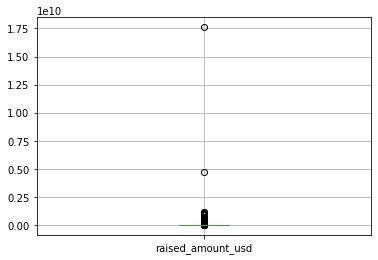

In [828]:
venture_df.boxplot()

In [829]:
round(venture_df['raised_amount_usd'].median(),2)

4000000.0

In [830]:
angel_df = funding_group.get_group('angel') 
angel_df


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd
32,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01/01/08,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,01/04/10,43923865.0
51,/organization/1006-tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01/01/09,/funding-round/a3631227d5232aa8c2303f252c4f1f87,01/01/11,1680511.0
69,/organization/10seconds-software,10seconds Software,http://www.10secondsSoftware.com,Enterprise Software|Mobility|Software,operating,AUS,2,Sydney,Sydney,01/07/09,/funding-round/dacf342722793cb7485fbdbd7530461d,01/07/10,100000.0
79,/organization/115-network-disks,115 network disks,http://www.115.com/,EdTech|Education,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/0966b3b472f4b912e167abaf8d06f77d,01/11/11,1680511.0
93,/organization/121nexus,121nexus,http://www.121nexus.com,Health Diagnostics|Medical Devices|Personaliza...,operating,USA,RI,Providence,Providence,07/10/11,/funding-round/9df05fa02b09752fcd0ecbf4e167cbef,22/01/13,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114906,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01/07/07,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,01/01/07,1680511.0
114912,/organization/zynstra,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30/11/11,/funding-round/dee233b3434185c14b3352034f72d798,18/09/12,2325000.0
114922,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01/01/94,/funding-round/55f33b179dd6f4516315348c1e8350c6,01/01/08,2007363.0
114928,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,15/12/10,875000.0


raised_amount_usd    600000.0
dtype: float64

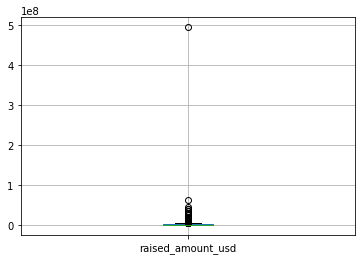

In [831]:
angel_df.boxplot()
angel_df.median()

In [832]:
angel_df.median()

raised_amount_usd    600000.0
dtype: float64

In [833]:
seed_df = funding_group.get_group('seed') 
seed_df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/b44fbb94153f6cdef13083530bb48030,01/03/14,700000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01/01/97,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,11/09/09,43360.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01/01/11,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,22/05/13,3000000.0
13,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01/08/11,/funding-round/03b975068632eba5bfdb937ec8c07a68,05/02/14,150000.0
15,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01/08/11,/funding-round/e82464f22241715dd1a6c77241055ed1,20/07/11,1000050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114933,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28/01/14,/funding-round/73721fffc980d228f051e87422aa8732,24/03/14,320000.0
114935,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/12,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,01/11/11,7000.0
114936,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/12,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,01/08/13,33149.0
114938,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/12,/funding-round/ff1aa06ed5da186c84f101549035d4ae,01/05/13,32842.0


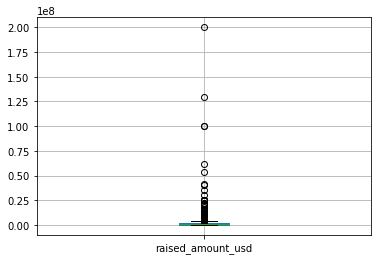

In [834]:
seed_df.boxplot()

In [835]:
round(seed_df['raised_amount_usd'].median(),2)

574586.5

In [836]:
private_eq_df = funding_group.get_group('private_equity') 
private_eq_df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24/10/13,/funding-round/11c228f58831bc7ed337ef69ecc560c2,01/02/15,6000000.0
153,/organization/1c-company,1C Company,http://1c.ru/eng,Games|Software|Video Games,closed,RUS,48,Moscow,Moscow,01/01/91,/funding-round/679ae989d9dd8195e989dda21eff44b7,03/10/11,200000000.0
178,/organization/1mpact-revolution-powering-helpf...,1mpact Revolution - Powering Helpfreely.org,http://www.1mpactrevolution.com,Non Profit|Online Shopping|Social Fundraising,operating,ESP,53,Las Palmas De Gran Canaria,Las Palmas De Gran Canaria,01/09/13,/funding-round/79a4c8a647e32bbe269f5c7489080cf9,01/11/15,1680511.0
231,/organization/21st-century-oncology,21st Century Oncology,http://21stcenturyoncology.com,Health and Wellness,operating,USA,FL,Fort Myers,Fort Myers,NaN,/funding-round/261bff457e1b31c4879e786ab7cf80ab,26/09/14,325000000.0
275,/organization/24med-sp,24med Sp,NaN,NaN,closed,NaN,NaN,NaN,NaN,NaN,/funding-round/346594127162a8229bd16903735b1c2b,01/01/08,1680511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114453,/organization/zmags,Zmags,http://www.zmags.com,Brand Marketing|Content Creators|Content Deliv...,acquired,USA,MA,Boston,Boston,01/12/06,/funding-round/0986b652615025b18810d17b896e3660,21/01/14,1680511.0
114637,/organization/zoot-2,ZOOT,http://www.zoot.cz/,E-Commerce|Fashion|Lifestyle,closed,NaN,NaN,NaN,NaN,01/09/12,/funding-round/08888e5fa1a9ceac73f993e342866a63,21/01/15,6.0
114871,/organization/zyme-solutions,Zyme Solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01/01/04,/funding-round/33d24808a624466e3498b0efc4942d23,20/05/13,1680511.0
114875,/organization/zyme-solutions,Zyme Solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01/01/04,/funding-round/b2cfedffee4860384ce7293a6e8db5da,20/05/13,5000000.0


In [837]:
private_eq_df.median()

raised_amount_usd    12122011.0
dtype: float64

In [838]:
venture_df.describe()

,raised_amount_usd
count,5.549300e+04
mean,1.079369e+07
std,8.220648e+07
min,0.000000e+00
25%,1.680511e+06
50%,4.000000e+06
75%,1.050000e+07
max,1.760000e+10


# # Group by Country Code to find out top 9 english speaking countries


In [839]:
# Group by Country Code to find out english speaking countries
language_group_df = venture_df.groupby("country_code")
language_group_df

In [840]:
# Filtering for raised_amount_usd 

# Filtering for Venture 
# venture_fund = master_frame[master_frame['funding_round_type'].str.contains("venture")]
# venture_fund.head()

# sorted_df = language_group_df.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
# sorted_df = venture_df.sort_values(['funding_round_type'],ascending=False).groupby('country_code').head(10)
# sorted_df

# Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type
# top_english = venture_df.sort_values(['raised_amount_usd'],ascending=False)


# top9 = top_English.drop(index=top_English[top_English['country_code'] == '(CHN)'].index, inplace=True)
# top9
language_group_df.describe()

raised_amount_usd                                         \
                         count          mean           std        min   
country_code                                                            
ARE                       34.0  1.047240e+07  1.891453e+07   200000.0   
ARG                       69.0  4.823543e+06  7.707238e+06    40000.0   
ARM                        2.0  1.325875e+07  7.818833e+06  7730000.0   
AUS                      224.0  6.041001e+06  9.283992e+06     7000.0   
AUT                       64.0  1.014751e+07  1.840004e+07    16055.0   
...                        ...           ...           ...        ...   
UKR                        8.0  2.224058e+06  2.541840e+06     2461.0   
URY                        8.0  2.478750e+06  3.162171e+06   500000.0   
USA                    38372.0  1.110871e+07  9.660446e+07        0.0   
VNM                       29.0  3.622298e+06  3.666088e+06  1000000.0   
ZAF                       37.0  6.961892e+06  1.701696e+07   349755.0   

                                                                
                     25%         50%         75%           max  
country_code                                                    
ARE            1680511.0   2455000.0   8812500.0  7.500000e+07  
ARG             650000.0   1680511.0   4200000.0  3.000000e+07  
ARM           10494375.0  13258750.0  16023125.0  1.878750e+07  
AUS            1680511.0   3265583.5   6025000.0  7.200000e+07  
AUT            1680511.0   3370000.0   9679900.0  1.200000e+08  
...                  ...         ...         ...           ...  
UKR             172500.0   1500000.0   3125000.0  7.000000e+06  
URY             707500.0   1500000.0   2250000.0  1.000000e+07  
USA            1680511.0   4700000.0  11500000.0  1.760000e+10  
VNM            1680511.0   1680511.0   4390000.0  1.500000e+07  
ZAF            1680511.0   1680511.0   4426106.0  1.000000e+08  

[103 rows x 8 columns]

In [841]:

#Crearing a dataframe for english speaking country
english_speaking_venture_df = venture_df[~venture_df['country_code'].isin(['CHN','TWN','JPN','BRA','EGY','RUS'])]
english_speaking_venture_df = english_speaking_venture_df.sort_values(by=['raised_amount_usd'],ascending=False)
english_speaking_venture_df = english_speaking_venture_df.drop_duplicates(subset=['country_code'])
english_speaking_venture_df = english_speaking_venture_df.dropna()
# english_speaking_venture_df
top9 = english_speaking_venture_df.head(9)
top9


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd
37567,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01/01/53,/funding-round/a1495c088d886c8a4f4ce74403b77385,21/10/06,1.760000e+10
36399,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,29/07/14,1.000000e+09
26904,/organization/delta-hydrocarbons,Delta Hydrocarbons,http://www.deltahydrocarbons.com/,Oil & Gas,operating,NLD,9,Utrecht,Utrecht,01/01/04,/funding-round/e7659ddbb1222187ccb43576ab38b26d,23/03/07,7.500000e+08
93956,/organization/spotify,Spotify,http://www.spotify.com,Cloud Computing|Entertainment|Music|Video Stre...,operating,SWE,26,Stockholm,Stockholm,14/07/06,/funding-round/2676d7b14a97360b37763bc6620b5cec,10/06/15,5.260000e+08
54778,/organization/lazada-group,Lazada Group,http://www.lazada.com,E-Commerce,operating,MYS,14,Kuala Lumpur,Kuala Lumpur,01/02/12,/funding-round/bb3974ad2b73144ebf572ac54adeb81d,09/12/13,2.743672e+08
31763,/organization/endurance-specialty-holdings,Endurance Specialty Holdings,http://endurance.bm,Finance,ipo,BMU,3,Bermuda,Hamilton,01/01/01,/funding-round/aa67182f21893f73c6161ac4a426f623,28/02/03,2.208000e+08
9151,/organization/auxmoney,Auxmoney,http://www.auxmoney.com,Finance,operating,DEU,7,Dusseldrof,DÃ¼sseldorf,01/01/07,/funding-round/0ff75bd96387e7867919c9ed11fda70b,21/10/15,1.701774e+08
40257,/organization/global-fashion-group,Global Fashion Group,http://global-fashion-group.com/,Fashion,operating,LUX,3,Luxemburg,Luxembourg,01/01/11,/funding-round/18ce261fa16a56adbcca76092c5da628,01/07/15,1.670000e+08
39643,/organization/gfg-group,GFG Group,http://www.gfg-group.com,Software,operating,NZL,E7,Auckland,Auckland,01/01/89,/funding-round/2bea2460b7737b401023e8612b56acaa,01/07/15,1.670000e+08


# Reading from mapping and making long_mapping dataframe and update master data frame

In [842]:

mappings = pd.read_csv("/Users/anurag/Desktop/Investment_assignments/mapping.csv",encoding='iso8859_9')

In [843]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [844]:
mappings = mappings.drop(['Blanks'],axis=1)

In [845]:
mappings = mappings.dropna()

In [846]:
mappings.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [847]:
sector_vars = list(mappings.columns[1:])

In [848]:
sector_vars

['Automotive & Sports',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [849]:
category_vars = list(np.setdiff1d(mappings.columns,sector_vars))

In [850]:
category_vars

['category_list']

In [851]:
mapping_long_df = pd.melt(mappings,id_vars=category_vars,value_vars=sector_vars)
mapping_long_df

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


In [852]:
mapping_long_df = mapping_long_df[mapping_long_df['value']==1]
mapping_long_df=mapping_long_df.drop('value',axis=1)

In [853]:
mapping_long_df

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [854]:
mapping_long_df= mapping_long_df.rename(columns={'variable':'sector'})

In [855]:
mapping_long_df

,category_list,sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


#english speaing venture df

In [856]:
english_speaking_venture_df['main_category'] = english_speaking_venture_df['category_list'].str.split('|').str[0]

In [857]:
english_speaking_venture_df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd,main_category
37567,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01/01/53,/funding-round/a1495c088d886c8a4f4ce74403b77385,21/10/06,1.760000e+10,Semiconductors
36399,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,29/07/14,1.000000e+09,E-Commerce
26904,/organization/delta-hydrocarbons,Delta Hydrocarbons,http://www.deltahydrocarbons.com/,Oil & Gas,operating,NLD,9,Utrecht,Utrecht,01/01/04,/funding-round/e7659ddbb1222187ccb43576ab38b26d,23/03/07,7.500000e+08,Oil & Gas
93956,/organization/spotify,Spotify,http://www.spotify.com,Cloud Computing|Entertainment|Music|Video Stre...,operating,SWE,26,Stockholm,Stockholm,14/07/06,/funding-round/2676d7b14a97360b37763bc6620b5cec,10/06/15,5.260000e+08,Cloud Computing
54778,/organization/lazada-group,Lazada Group,http://www.lazada.com,E-Commerce,operating,MYS,14,Kuala Lumpur,Kuala Lumpur,01/02/12,/funding-round/bb3974ad2b73144ebf572ac54adeb81d,09/12/13,2.743672e+08,E-Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,/organization/hmall-ma,Hmall.ma Morocco / North Africa,http://www.hmall.ma,Coupons|East Africa|E-Commerce|Marketplaces|We...,operating,MAR,45,Casablanca,Casablanca,19/06/12,/funding-round/9f17035fdabe6810417874cc2f12465e,13/08/13,1.600000e+06,Coupons
40786,/organization/gohome,GoHome,http://gohome.hr,Property Management|Real Estate|Search,operating,HRV,21,Zagreb,Zagreb,01/10/07,/funding-round/c753d4c51181c33af2ae9d7a25575ecf,01/04/08,1.331100e+06,Property Management
54437,/organization/lamsa,Lamsa,http://www.lamsaworld.com/Welcome.do;jsessioni...,Apps|Digital Media|Kids|Software,operating,SAU,10,SAU - Other,Ar Riyadh,30/04/12,/funding-round/d36dd207a61fd8272cae669d12f51625,01/11/13,5.000000e+05,Apps
53098,/organization/kipo,Kipo,http://www.kipobusiness.com,Android|Apps|iOS|Location Based Services|Mobil...,operating,GTM,7,Guatemala City,Guatemala City,01/11/12,/funding-round/f760a804af9e32e2e7ab7a21021b0d01,06/01/13,3.000000e+05,Android


In [858]:
english_speaking_venture_df=english_speaking_venture_df.drop('category_list',axis=1)
english_speaking_venture_df

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd,main_category
37567,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,ipo,USA,TX,Austin,Austin,01/01/53,/funding-round/a1495c088d886c8a4f4ce74403b77385,21/10/06,1.760000e+10,Semiconductors
36399,/organization/flipkart,Flipkart,http://www.flipkart.com,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,29/07/14,1.000000e+09,E-Commerce
26904,/organization/delta-hydrocarbons,Delta Hydrocarbons,http://www.deltahydrocarbons.com/,operating,NLD,9,Utrecht,Utrecht,01/01/04,/funding-round/e7659ddbb1222187ccb43576ab38b26d,23/03/07,7.500000e+08,Oil & Gas
93956,/organization/spotify,Spotify,http://www.spotify.com,operating,SWE,26,Stockholm,Stockholm,14/07/06,/funding-round/2676d7b14a97360b37763bc6620b5cec,10/06/15,5.260000e+08,Cloud Computing
54778,/organization/lazada-group,Lazada Group,http://www.lazada.com,operating,MYS,14,Kuala Lumpur,Kuala Lumpur,01/02/12,/funding-round/bb3974ad2b73144ebf572ac54adeb81d,09/12/13,2.743672e+08,E-Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,/organization/hmall-ma,Hmall.ma Morocco / North Africa,http://www.hmall.ma,operating,MAR,45,Casablanca,Casablanca,19/06/12,/funding-round/9f17035fdabe6810417874cc2f12465e,13/08/13,1.600000e+06,Coupons
40786,/organization/gohome,GoHome,http://gohome.hr,operating,HRV,21,Zagreb,Zagreb,01/10/07,/funding-round/c753d4c51181c33af2ae9d7a25575ecf,01/04/08,1.331100e+06,Property Management
54437,/organization/lamsa,Lamsa,http://www.lamsaworld.com/Welcome.do;jsessioni...,operating,SAU,10,SAU - Other,Ar Riyadh,30/04/12,/funding-round/d36dd207a61fd8272cae669d12f51625,01/11/13,5.000000e+05,Apps
53098,/organization/kipo,Kipo,http://www.kipobusiness.com,operating,GTM,7,Guatemala City,Guatemala City,01/11/12,/funding-round/f760a804af9e32e2e7ab7a21021b0d01,06/01/13,3.000000e+05,Android


In [859]:
master_english_speaking_venture_frame = pd.merge(english_speaking_venture_df,mapping_long_df,how="inner",left_on="main_category",right_on="category_list")
master_english_speaking_venture_frame

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funded_at,raised_amount_usd,main_category,category_list,sector
0,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,ipo,USA,TX,Austin,Austin,01/01/53,/funding-round/a1495c088d886c8a4f4ce74403b77385,21/10/06,1.760000e+10,Semiconductors,Semiconductors,Cleantech / Semiconductors
1,/organization/flipkart,Flipkart,http://www.flipkart.com,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,29/07/14,1.000000e+09,E-Commerce,E-Commerce,Others
2,/organization/lazada-group,Lazada Group,http://www.lazada.com,operating,MYS,14,Kuala Lumpur,Kuala Lumpur,01/02/12,/funding-round/bb3974ad2b73144ebf572ac54adeb81d,09/12/13,2.743672e+08,E-Commerce,E-Commerce,Others
3,/organization/privalia,Privalia,http://www.privalia.com,operating,ESP,56,Barcelona,Barcelona,01/01/06,/funding-round/72b93bfb950e728af9d8dc0f91717296,04/10/10,9.500000e+07,E-Commerce,E-Commerce,Others
4,/organization/internet-mall,Internet Mall,http://mall.cz,operating,CZE,52,Prague,Praha,01/01/00,/funding-round/df1eb36bf976be94b3747be40798a019,03/06/08,4.500000e+07,E-Commerce,E-Commerce,Others
5,/organization/avenida,Avenida,http://www.avenida.com.ar,operating,ARG,7,Buenos Aires,Buenos Aires,01/07/13,/funding-round/e5b166b3c4a212660cc93170ade9645a,13/11/15,3.000000e+07,E-Commerce,E-Commerce,Others
6,/organization/ensogo,Ensogo,http://www.ensogo.com,acquired,THA,40,Bangkok,Bangkok,01/07/09,/funding-round/3a701e7e90c0355eddd5c07da1c47470,20/04/15,2.700000e+07,E-Commerce,E-Commerce,Others
7,/organization/cinepapaya,Cinepapaya,http://www.cinepapaya.com,operating,PER,15,Lima,Lima,16/05/12,/funding-round/d876ea3f7915a2b685247c99f5d4a8dd,20/10/14,2.000000e+06,E-Commerce,E-Commerce,Others
8,/organization/delta-hydrocarbons,Delta Hydrocarbons,http://www.deltahydrocarbons.com/,operating,NLD,9,Utrecht,Utrecht,01/01/04,/funding-round/e7659ddbb1222187ccb43576ab38b26d,23/03/07,7.500000e+08,Oil & Gas,Oil & Gas,Others
9,/organization/spotify,Spotify,http://www.spotify.com,operating,SWE,26,Stockholm,Stockholm,14/07/06,/funding-round/2676d7b14a97360b37763bc6620b5cec,10/06/15,5.260000e+08,Cloud Computing,Cloud Computing,"News, Search and Messaging"


In [860]:
master_frame['main_category'] = master_frame['category_list'].str.split('|').str[0]

In [861]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14/10/14,1680511.0,Application Platforms
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01/03/14,700000.0,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30/01/14,3406878.0,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/07,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/03/08,2000000.0,Curated Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/12,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01/03/14,41313.0,Advertising
114938,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/12,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01/05/13,32842.0,Advertising
114939,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01/01/11,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01/08/14,1680511.0,NaN
114940,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01/01/14,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01/01/15,18192.0,Consumer Electronics


In [862]:
master_frame=master_frame.drop('category_list',axis=1)
master_frame

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14/10/14,1680511.0,Application Platforms
2,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04/09/14,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01/03/14,700000.0,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30/01/14,3406878.0,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,01/01/07,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/03/08,2000000.0,Curated Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,operating,HRV,15,Split,Split,13/05/12,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01/03/14,41313.0,Advertising
114938,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,operating,HRV,15,Split,Split,13/05/12,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01/05/13,32842.0,Advertising
114939,/organization/ãeron,ÃERON,http://www.aeron.hu/,operating,NaN,NaN,NaN,NaN,01/01/11,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01/08/14,1680511.0,NaN
114940,/organization/ãasys-2,Ãasys,http://www.oasys.io/,operating,USA,CA,SF Bay Area,San Francisco,01/01/14,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01/01/15,18192.0,Consumer Electronics


In [863]:
master_frame = pd.merge(master_frame,mapping_long_df,how="inner",left_on="main_category",right_on="category_list")
master_frame

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0,Media,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06/10/15,15000000.0,Media,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07/05/13,5800000.0,Media,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26/03/14,18000000.0,Media,Media,Entertainment
4,/organization/a-b-productions,A.B Productions,NaN,operating,USA,CA,Los Angeles,Los Angeles,11/12/12,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,21/01/14,1680511.0,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103388,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,operating,USA,PA,Pittsburgh,Pittsburgh,07/10/12,/funding-round/017fef93620f71e5b884435972b440e8,seed,17/04/14,1680511.0,Gay & Lesbian,Gay & Lesbian,Others
103389,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,operating,USA,PA,Pittsburgh,Pittsburgh,07/10/12,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,09/06/13,25000.0,Gay & Lesbian,Gay & Lesbian,Others
103390,/organization/wiselike,Wiselike,https://wiselike.com/,operating,USA,CA,SF Bay Area,San Francisco,NaN,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,31/08/15,1250000.0,Q&A,Q&A,"News, Search and Messaging"
103391,/organization/yes-no,yes.no,http://yes.no,closed,ISR,5,Tel Aviv,Tel Aviv,01/01/15,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,01/05/15,1000000.0,Q&A,Q&A,"News, Search and Messaging"


In [864]:
master_frame=master_frame.drop('category_list',axis=1)
master_frame

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05/01/15,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06/10/15,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07/05/13,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26/03/14,18000000.0,Media,Entertainment
4,/organization/a-b-productions,A.B Productions,NaN,operating,USA,CA,Los Angeles,Los Angeles,11/12/12,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,21/01/14,1680511.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103388,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,operating,USA,PA,Pittsburgh,Pittsburgh,07/10/12,/funding-round/017fef93620f71e5b884435972b440e8,seed,17/04/14,1680511.0,Gay & Lesbian,Others
103389,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,operating,USA,PA,Pittsburgh,Pittsburgh,07/10/12,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,09/06/13,25000.0,Gay & Lesbian,Others
103390,/organization/wiselike,Wiselike,https://wiselike.com/,operating,USA,CA,SF Bay Area,San Francisco,NaN,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,31/08/15,1250000.0,Q&A,"News, Search and Messaging"
103391,/organization/yes-no,yes.no,http://yes.no,closed,ISR,5,Tel Aviv,Tel Aviv,01/01/15,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,01/05/15,1000000.0,Q&A,"News, Search and Messaging"


In [865]:
master_frame = master_frame.dropna()
master_frame

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06/10/15,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07/05/13,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01/01/11,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26/03/14,18000000.0,Media,Entertainment
5,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,operating,USA,MT,Missoula,Missoula,31/07/11,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26/03/14,1090000.0,Media,Entertainment
7,/organization/action-audio-apps,Action Audio Apps,http://actionaudioapps.net/,operating,USA,NY,NY - Other,Pleasantville,12/06/12,/funding-round/1c944693d17e52a50157cf5aa4c13687,equity_crowdfunding,27/02/15,1680511.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103387,/organization/winegrid,Winegrid,http://watgrid.com/winegrid/,operating,PRT,2,Porto,Aveiro,01/01/15,/funding-round/ca74d023bf0d860f4b4aaf61f0892810,seed,25/09/15,16773.0,Productivity,Others
103388,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,operating,USA,PA,Pittsburgh,Pittsburgh,07/10/12,/funding-round/017fef93620f71e5b884435972b440e8,seed,17/04/14,1680511.0,Gay & Lesbian,Others
103389,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,operating,USA,PA,Pittsburgh,Pittsburgh,07/10/12,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,09/06/13,25000.0,Gay & Lesbian,Others
103391,/organization/yes-no,yes.no,http://yes.no,closed,ISR,5,Tel Aviv,Tel Aviv,01/01/15,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,01/05/15,1000000.0,Q&A,"News, Search and Messaging"


# Top 3 countries USA , IND and NLD D1, D2 , D3 dataframe

In [866]:
D1 = master_frame[master_frame['country_code'].str.contains("USA")]
D1 = D1[D1['funding_round_type'].str.contains("venture")]
D1

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
17,/organization/audiosocket,Audiosocket,http://audiosocket.com,operating,USA,WA,Seattle,Seattle,01/05/08,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02/05/13,650000.0,Media,Entertainment
18,/organization/audiosocket,Audiosocket,http://audiosocket.com,operating,USA,WA,Seattle,Seattle,01/05/08,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02/09/09,750000.0,Media,Entertainment
19,/organization/audiosocket,Audiosocket,http://audiosocket.com,operating,USA,WA,Seattle,Seattle,01/05/08,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15/02/12,1582300.0,Media,Entertainment
23,/organization/babble,Babble,http://www.babble.com,acquired,USA,NY,New York City,New York,01/12/06,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05/02/09,2000000.0,Media,Entertainment
24,/organization/babble,Babble,http://www.babble.com,acquired,USA,NY,New York City,New York,01/12/06,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12/05/09,1250000.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103359,/organization/silverback-enterprise-group-inc,"Silverback Enterprise Group, Inc.",http://silverbackeg.com/index.html,operating,USA,TX,Austin,Austin,01/01/10,/funding-round/4ee9df15fc41ac59b459554a41774008,venture,02/01/14,19800000.0,Enterprise Purchasing,"Social, Finance, Analytics, Advertising"
103364,/organization/society-of-grownups,Society of Grownups,http://societyofgrownups.com/,operating,USA,MA,Boston,Boston,01/01/14,/funding-round/83237a23ca374ea1a5ee099938e00df6,venture,15/10/15,100000000.0,Young Adults,Others
103377,/organization/thisnext,ThisNext,http://www.thisnext.com,operating,USA,CA,Los Angeles,Santa Monica,01/12/05,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,01/01/08,5000000.0,Social Buying,"Social, Finance, Analytics, Advertising"
103379,/organization/thisnext,ThisNext,http://www.thisnext.com,operating,USA,CA,Los Angeles,Santa Monica,01/12/05,/funding-round/592259ebb95e05fd04e1bdc021a9d080,venture,28/01/10,1199999.0,Social Buying,"Social, Finance, Analytics, Advertising"


In [867]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28616 entries, 17 to 103380
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                28616 non-null  object 
 1   name                     28616 non-null  object 
 2   homepage_url             28616 non-null  object 
 3   status                   28616 non-null  object 
 4   country_code             28616 non-null  object 
 5   state_code               28616 non-null  object 
 6   region                   28616 non-null  object 
 7   city                     28616 non-null  object 
 8   founded_at               28616 non-null  object 
 9   funding_round_permalink  28616 non-null  object 
 10  funding_round_type       28616 non-null  object 
 11  funded_at                28616 non-null  object 
 12  raised_amount_usd        28616 non-null  float64
 13  main_category            28616 non-null  object 
 14  sector              

In [868]:
D2 = master_frame[master_frame['country_code'].str.contains("IND")]
D2 = D2[D2['funding_round_type'].str.contains("venture")]
D2

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
127,/organization/manas-informatics,Manas Informatic,http://www.topnews.in,operating,IND,23,Mohali,Mohali,05/05/07,/funding-round/719e50301803d3918ffa558fc877e41c,venture,02/02/08,160000.0,Media,Entertainment
849,/organization/birds-eye-systems,Birds Eye Systems,http://birdseyetech.com,operating,IND,16,Mumbai,Mumbai,01/01/10,/funding-round/efd4b1671334857feb157972242abf2d,venture,30/09/14,1680511.0,Apps,"News, Search and Messaging"
975,/organization/chillr-2,Chillr,http://chillr.in,operating,IND,13,Cochin,Cochin,22/12/13,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,02/10/15,6000000.0,Apps,"News, Search and Messaging"
1136,/organization/doormint,DoorMint,http://doormint.in/,operating,IND,19,Bangalore,Bengaluru,01/01/14,/funding-round/07ef4bbe43f9099323f7016c971e29ec,venture,05/08/15,3000000.0,Apps,"News, Search and Messaging"
1528,/organization/innoz,Innoz,http://innoz.in,operating,IND,19,Bangalore,Bangalore,15/09/08,/funding-round/e1cd0071f8313683acde18c88fe1beff,venture,01/04/12,1680511.0,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103093,/organization/revx,RevX,http://www.revx.io,operating,IND,19,Bangalore,Bangalore,01/01/13,/funding-round/b2082b47ea0926269c740e189546ac84,venture,25/08/15,4000000.0,Mobile Advertising,"Social, Finance, Analytics, Advertising"
103109,/organization/souqalmal,Souqalmal.com,http://www.souqalmal.com,operating,IND,36,IND - Other,Dubai,21/05/12,/funding-round/b05eca8d0bd96ccd5d8d8a15f776353d,venture,01/12/13,1200000.0,Price Comparison,"Social, Finance, Analytics, Advertising"
103125,/organization/holidayiq-com,HolidayIQ,http://www.holidayiq.com,operating,IND,19,Bangalore,Bangalore,01/01/04,/funding-round/c402dcbdd413b7ea344a5681a4428645,venture,20/07/15,15000000.0,Resorts,Entertainment
103126,/organization/holidayiq-com,HolidayIQ,http://www.holidayiq.com,operating,IND,19,Bangalore,Bangalore,01/01/04,/funding-round/dc7808dc9ce1446e2e915fc85125c476,venture,07/02/13,5000000.0,Resorts,Entertainment


In [869]:
D3 = master_frame[master_frame['country_code'].str.contains("NLD")]
D3 = D3[D3['funding_round_type'].str.contains("venture")]
D3

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
62,/organization/crowdynews,Crowdynews,http://www.crowdynews.com,operating,NLD,4,Groningen,Groningen,01/01/10,/funding-round/458785d3ed4c0a32d9364bb5b77666f5,venture,12/01/15,2962524.0,Media,Entertainment
332,/organization/asysco,Asysco,http://www.asysco.com,operating,NLD,1,NLD - Other,Coevorden,01/01/03,/funding-round/d6ef58fd66decfb3a00672f3e71a07e1,venture,01/01/02,1680511.0,Application Platforms,"News, Search and Messaging"
504,/organization/onegini,Onegini,https://www.onegini.com,operating,NLD,11,NLD - Other,Woerden,01/01/12,/funding-round/6d7eedd7c68b5ff867d44c07bd50d50f,venture,30/11/15,1588517.0,Application Platforms,"News, Search and Messaging"
2290,/organization/ringcredible,RingCredible,http://www.ringcredible.com,operating,NLD,9,Utrecht,Breukelen,01/03/13,/funding-round/5fe285b4e7502c781990dcef92bddd49,venture,24/07/13,1500000.0,Apps,"News, Search and Messaging"
2824,/organization/wakoopa,Wakoopa,http://www.wakoopa.com,operating,NLD,7,Amsterdam,Amsterdam,01/01/07,/funding-round/066f7ea2ccf0488807d46d0e6bfa8ba3,venture,02/06/08,1000000.0,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98620,/organization/protix-biosystems,Protix Biosystems,http://www.protix.eu,operating,NLD,6,NLD - Other,Dongen,01/01/09,/funding-round/759f482c0c9692df4f202a153c8f9a62,venture,03/02/15,1680511.0,Biometrics,Cleantech / Semiconductors
98826,/organization/vc4africa,VC4Africa,http://www.vc4africa.biz,operating,NLD,7,Amsterdam,Amsterdam,01/05/08,/funding-round/c4999677873a82b5ea5869f6b5a427d6,venture,19/12/14,26900000.0,Angels,Others
101720,/organization/roomlr,Roomlr,http://roomlr.com,operating,NLD,7,Amsterdam,Amsterdam,01/01/13,/funding-round/11ed67654f6d6b0957d1c1cccd97af8d,venture,26/02/14,1680511.0,Rental Housing,Others
102202,/organization/servoy,Servoy,http://www.servoy.com,operating,NLD,9,Utrecht,Amersfoort,01/01/01,/funding-round/6913140723cb9009e453fc54a33ccffa,venture,08/01/06,1680511.0,PaaS,"Social, Finance, Analytics, Advertising"


In [870]:
D1['funding_round_type'].value_counts()

venture    28616
Name: funding_round_type, dtype: int64

In [871]:
D2['funding_round_type'].value_counts()

venture    741
Name: funding_round_type, dtype: int64

In [872]:
D3['funding_round_type'].value_counts()

venture    150
Name: funding_round_type, dtype: int64

In [873]:
round(D1['raised_amount_usd'].sum(),2)

328936516059.0

In [874]:
round(D2['raised_amount_usd'].sum(),2)

12283017086.0

In [875]:
round(D3['raised_amount_usd'].sum(),2)

2237570800.0

In [876]:
D1['sector'].value_counts()


Others                                     7050
Cleantech / Semiconductors                 6048
Social, Finance, Analytics, Advertising    4985
News, Search and Messaging                 3959
Health                                     2468
Manufacturing                              2051
Entertainment                              1612
Automotive & Sports                         443
Name: sector, dtype: int64

In [877]:
D2['sector'].value_counts()

Others                                     282
News, Search and Messaging                 128
Social, Finance, Analytics, Advertising     88
Entertainment                               75
Manufacturing                               51
Cleantech / Semiconductors                  47
Health                                      43
Automotive & Sports                         27
Name: sector, dtype: int64

In [878]:
D3['sector'].value_counts()

Cleantech / Semiconductors                 42
Others                                     30
Social, Finance, Analytics, Advertising    20
Manufacturing                              19
News, Search and Messaging                 18
Health                                     11
Entertainment                               7
Automotive & Sports                         3
Name: sector, dtype: int64

# Top sector count-wise, which company received the highest investment

In [879]:
higest_investment_D1 = D1[D1['sector'].str.contains("Others")]

higest_investment_D1 = higest_investment_D1.sort_values(by="raised_amount_usd",ascending=False)
higest_investment_D1

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
38664,/organization/social-finance,SoFi,http://www.sofi.com,operating,USA,CA,SF Bay Area,San Francisco,01/04/11,/funding-round/1609f1ba4de61c4760c91dc69f4ae980,venture,30/09/15,1.000000e+09,Education,Others
51649,/organization/zenefits,Zenefits,http://www.zenefits.com,operating,USA,CA,SF Bay Area,San Francisco,01/01/13,/funding-round/2db96f511dc2de33b6edc7844b7c240c,venture,06/05/15,5.000000e+08,Enterprise Software,Others
100710,/organization/snapchat,Snapchat,http://www.snapchat.com,operating,USA,CA,CA - Other,Pacific Palisades,01/05/11,/funding-round/4a2de2da69d5ccaac8589108c8055e42,venture,31/12/14,4.850000e+08,File Sharing,Others
31742,/organization/livingsocial,LivingSocial,http://www.livingsocial.com,operating,USA,DC,"Washington, D.C.",Washington,01/01/07,/funding-round/5c3bbce60473fdee90a52231099daa59,venture,04/04/11,4.000000e+08,E-Commerce,Others
31444,/organization/jet,Jet,http://www.jet.com/,operating,USA,NJ,Newark,Hoboken,01/07/13,/funding-round/79d35bb376dcc222a8a441cd1ab6cf0b,venture,24/11/15,3.500000e+08,E-Commerce,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9404,/organization/igor-2,Igor,http://www.igor-tech.com/,operating,USA,IA,Des Moines,Des Moines,01/01/13,/funding-round/f809a83a1043d26cb530ea9750ba6484,venture,07/10/14,2.000000e+00,Software,Others
51005,/organization/skykick,SkyKick,http://www.skykick.com,operating,USA,WA,Seattle,Seattle,01/10/11,/funding-round/c81df07be83403e629832b24bcacf2ed,venture,23/04/13,0.000000e+00,Enterprise Software,Others
48855,/organization/appdome,AppDome,https://www.appdome.com,operating,USA,NY,New York City,New York,01/01/12,/funding-round/e761b757ab3d3d053262a49173467fa9,venture,19/02/14,0.000000e+00,Enterprise Software,Others
11404,/organization/promisec,Promisec,http://www.promisec.com,operating,USA,MA,Boston,Needham,01/01/04,/funding-round/7ba9ea5b281687a9d546d27a1b195453,venture,01/01/06,0.000000e+00,Software,Others


In [880]:
second_higest_investment_D1 = D1[D1['sector'].str.contains("Cleantech / Semiconductors")]

second_higest_investment_D1 = second_higest_investment_D1.sort_values(by="raised_amount_usd",ascending=False)
second_higest_investment_D1

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
79425,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,ipo,USA,TX,Austin,Austin,01/01/53,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21/10/06,1.760000e+10,Semiconductors,Cleantech / Semiconductors
21169,/organization/juno-therapeutics,Juno Therapeutics,http://junotherapeutics.com,ipo,USA,WA,Seattle,Seattle,01/01/13,/funding-round/f93ba64f2e858105c47ee4901dc71d74,venture,14/07/15,8.498035e+08,Biotechnology,Cleantech / Semiconductors
90500,/organization/greatpoint-energy,GreatPoint Energy,http://www.greatpointenergy.com,operating,USA,MA,Boston,Cambridge,01/01/04,/funding-round/10052412d43b77826e7f7cb57578da0f,venture,17/02/12,4.200000e+08,Clean Energy,Cleantech / Semiconductors
23786,/organization/quantrx-biomedical,QuantRx Biomedical,http://quantrx.com/underconstruction.htm,operating,USA,OR,"Portland, Oregon",Tualatin,01/01/86,/funding-round/773952f16706442262e83b2f5cef9322,venture,14/08/09,4.060397e+08,Biotechnology,Cleantech / Semiconductors
58983,/organization/better-place,Better Place,http://www.betterplace.com,acquired,USA,CA,SF Bay Area,Palo Alto,29/10/07,/funding-round/84f7b1b4bb7ec63eed4ac26f3f073b1d,venture,01/01/10,3.500000e+08,Clean Technology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17845,/organization/canfield-medical-supply,Canfield Medical Supply,http://canfieldmedical.com,closed,USA,OH,Youngstown,Canfield,01/01/92,/funding-round/a3a535a5fbfd74de3269d6cb63bd62ff,venture,14/03/14,2.750000e+03,Biotechnology,Cleantech / Semiconductors
15956,/organization/adimab,Adimab,http://www.adimab.com,operating,USA,NH,"Manchester, New Hampshire",Lebanon,01/05/07,/funding-round/2f698a171a21d5ec529180c089843157,venture,16/07/07,2.384000e+03,Biotechnology,Cleantech / Semiconductors
61021,/organization/southwest-windpower,Southwest Windpower,http://www.windenergy.com,acquired,USA,CO,Denver,Broomfield,01/01/87,/funding-round/a3336a86aa24c137f1d78dca3f366ecf,venture,31/05/07,6.000000e+00,Clean Technology,Cleantech / Semiconductors
18757,/organization/cosmosid,CosmosID,http://cosmosid.com,operating,USA,MD,"Washington, D.C.",Rockville,01/01/07,/funding-round/e079d7217aa8b7157658cf9a0b19b7f2,venture,27/09/11,0.000000e+00,Biotechnology,Cleantech / Semiconductors


In [881]:
higest_investment_D2 = D2[D2['sector'].str.contains("Others")]

higest_investment_D2 = higest_investment_D2.sort_values(by="raised_amount_usd",ascending=False)
higest_investment_D2

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
30874,/organization/flipkart,Flipkart,http://www.flipkart.com,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,venture,29/07/14,1.000000e+09,E-Commerce,Others
30879,/organization/flipkart,Flipkart,http://www.flipkart.com,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/fc494b8372efe09ff4622d1b3940a44d,venture,21/12/14,7.000000e+08,E-Commerce,Others
30868,/organization/flipkart,Flipkart,http://www.flipkart.com,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/0f95a3605ce19904851d6af4b31bd37f,venture,26/05/14,2.100000e+08,E-Commerce,Others
30869,/organization/flipkart,Flipkart,http://www.flipkart.com,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/299d4ccf054fe9b04e96614c17d8a338,venture,10/07/13,2.000000e+08,E-Commerce,Others
30871,/organization/flipkart,Flipkart,http://www.flipkart.com,operating,IND,19,Bangalore,Bangalore,01/09/07,/funding-round/956337485d8a5a1ff6bb8ae42dbaf357,venture,08/10/13,1.600000e+08,E-Commerce,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29942,/organization/bluegape-lifestyle,Bluegape Lifestyle,http://www.bluegape.com,operating,IND,7,New Delhi,New Delhi,29/12/11,/funding-round/7ef0d00792ad77eceaadf47d96c15cf4,venture,08/01/14,2.500000e+05,E-Commerce,Others
7645,/organization/canvera-digital-technologies,Canvera Digital Technologies,http://canvera.com,operating,IND,19,Bangalore,Bangalore,01/01/07,/funding-round/9be0f266bb8764aeb51e3437c3dc14e1,venture,04/02/14,2.400000e+05,Software,Others
52957,/organization/testbook-com,Testbook.com,http://testbook.com,operating,IND,16,Mumbai,Mumbai,01/04/13,/funding-round/6f5174e336bfb57685c836408f0cee79,venture,29/10/14,2.000000e+05,EdTech,Others
37889,/organization/experifun,Experifun,http://experifun.com,operating,IND,19,Bangalore,Bangalore,01/01/12,/funding-round/a78838af8a348f853b6e2e7cfc38391a,venture,27/11/13,7.500000e+04,Education,Others


In [882]:
second_higest_investment_D2 = D2[D2['sector'].str.contains("News, Search and Messaging")]

second_higest_investment_D2 = second_higest_investment_D2.sort_values(by="raised_amount_usd",ascending=False)
second_higest_investment_D2

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
5369,/organization/quikr-india,Quikr,http://www.quikr.com,operating,IND,16,Mumbai,Mumbai,12/01/08,/funding-round/c3d8b1a4db1354d4c3dbc60a8171565f,venture,07/04/15,150000000.0,Curated Web,"News, Search and Messaging"
5370,/organization/quikr-india,Quikr,http://www.quikr.com,operating,IND,16,Mumbai,Mumbai,12/01/08,/funding-round/ce9bc87569765200a4ba52d06071e466,venture,11/03/14,90000000.0,Curated Web,"News, Search and Messaging"
54668,/organization/freecharge,FreeCharge,https://www.freecharge.in/,acquired,IND,16,Mumbai,Mumbai,01/01/10,/funding-round/6584c8fed1cede9215e8d712a6534530,venture,05/02/15,80000000.0,Internet,"News, Search and Messaging"
72835,/organization/hike,hike,http://get.hike.in,operating,IND,7,New Delhi,New Delhi,12/12/12,/funding-round/73d21a2875dbc2e1f9fef92aeac3b72a,venture,26/08/14,65000000.0,Messaging,"News, Search and Messaging"
5366,/organization/quikr-india,Quikr,http://www.quikr.com,operating,IND,16,Mumbai,Mumbai,12/01/08,/funding-round/75d6aa7365247e6c23fe83220a40c9c4,venture,17/09/14,60000000.0,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,/organization/red-panda-innovation-labs,Red Panda Innovation Labs,http://www.redpanda.co.in,operating,IND,16,Mumbai,Mumbai,29/11/12,/funding-round/ae6d42e493ce9888722b74745a51401c,venture,01/09/11,500000.0,Apps,"News, Search and Messaging"
2240,/organization/railyatri,RailYatri,http://RailYatri.in,operating,IND,36,New Delhi,Noida,01/01/11,/funding-round/29aeff452a735cfd607dc58ddb93291a,venture,20/11/14,486000.0,Apps,"News, Search and Messaging"
102793,/organization/room-n-house,Room n House,http://roomnhouse.com,operating,IND,16,Mumbai,Mumbai,27/11/12,/funding-round/4df20047596148cfd5553a7ef5b55903,venture,16/07/14,166396.0,Peer-to-Peer,"News, Search and Messaging"
93487,/organization/youtellme,YouTellMe,https://youtellme.com,operating,IND,16,Mumbai,Mumbai,01/03/14,/funding-round/7498616cbec07dbe55df9c53a8fafc66,venture,09/12/14,100000.0,Comparison Shopping,"News, Search and Messaging"


In [883]:
higest_investment_D3 = D3[D3['sector'].str.contains("Cleantech / Semiconductors")]

higest_investment_D3 = higest_investment_D3.sort_values(by="raised_amount_usd",ascending=False)
higest_investment_D3

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
21815,/organization/merus,Merus,http://www.merus.nl,operating,NLD,9,Utrecht,Utrecht,01/01/03,/funding-round/a0141192371b5436fac348cf8c3f91b1,venture,26/04/15,79139323.0,Biotechnology,Cleantech / Semiconductors
58950,/organization/avantium-technologies,Avantium Technologies,http://www.avantium.com,operating,NLD,7,Amsterdam,Amsterdam,01/01/00,/funding-round/68a44a36152db5d8362a1d356bcce78c,venture,05/06/14,50000000.0,Clean Technology,Cleantech / Semiconductors
58949,/organization/avantium-technologies,Avantium Technologies,http://www.avantium.com,operating,NLD,7,Amsterdam,Amsterdam,01/01/00,/funding-round/0a614c5332521f491c02e0494ee6e781,venture,09/06/11,43900000.0,Clean Technology,Cleantech / Semiconductors
21814,/organization/merus,Merus,http://www.merus.nl,operating,NLD,9,Utrecht,Utrecht,01/01/03,/funding-round/53cec74c43e607cd7d872206ab1b70b3,venture,03/10/13,39884600.0,Biotechnology,Cleantech / Semiconductors
16113,/organization/agendia,Agendia,http://www.agendia.com,operating,NLD,7,Amsterdam,Amsterdam,01/01/03,/funding-round/47f4512bea5c05e0bcdb074ca61360bb,venture,28/08/07,34000000.0,Biotechnology,Cleantech / Semiconductors
21813,/organization/merus,Merus,http://www.merus.nl,operating,NLD,9,Utrecht,Utrecht,01/01/03,/funding-round/42343597f6cabf2cd47029f8cb87a67a,venture,29/01/10,30306220.0,Biotechnology,Cleantech / Semiconductors
23589,/organization/prosensa,Prosensa,http://www.prosensa.eu,acquired,NLD,11,The Hague,Leiden,01/01/02,/funding-round/243cb3fbbca5e37fc16f95153d4b3dbc,venture,25/01/12,29766600.0,Biotechnology,Cleantech / Semiconductors
23592,/organization/prosensa,Prosensa,http://www.prosensa.eu,acquired,NLD,11,The Hague,Leiden,01/01/02,/funding-round/cfe5a27f81031a8578c837276be08b57,venture,17/12/08,25306200.0,Biotechnology,Cleantech / Semiconductors
16114,/organization/agendia,Agendia,http://www.agendia.com,operating,NLD,7,Amsterdam,Amsterdam,01/01/03,/funding-round/fb15b65dae7f53c86034ca36183a60c1,venture,23/09/09,23000000.0,Biotechnology,Cleantech / Semiconductors
79483,/organization/greenpeak-technologies,GreenPeak Technologies,http://www.greenpeak.com,operating,NLD,9,Utrecht,Utrecht,01/01/04,/funding-round/96f25f1d85b9b89715476db830369f70,venture,29/10/09,19000000.0,Semiconductors,Cleantech / Semiconductors


In [884]:
second_higest_investment_D3 = D3[D3['sector'].str.contains("Others")]

second_higest_investment_D3 = second_higest_investment_D3.sort_values(by="raised_amount_usd",ascending=False)
second_higest_investment_D3

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
88690,/organization/delta-hydrocarbons,Delta Hydrocarbons,http://www.deltahydrocarbons.com/,operating,NLD,9,Utrecht,Utrecht,01/01/04,/funding-round/e7659ddbb1222187ccb43576ab38b26d,venture,23/03/07,750000000.0,Oil & Gas,Others
8279,/organization/cyclomedia-technology,CycloMedia Technology,http://www.cyclomedia.com,operating,NLD,3,NLD - Other,Waardenburg,01/01/80,/funding-round/dc4921cb9fa17710a17ff2cccb1ee4cd,venture,15/08/08,29360000.0,Software,Others
98826,/organization/vc4africa,VC4Africa,http://www.vc4africa.biz,operating,NLD,7,Amsterdam,Amsterdam,01/05/08,/funding-round/c4999677873a82b5ea5869f6b5a427d6,venture,19/12/14,26900000.0,Angels,Others
50427,/organization/o3b-networks,O3b Networks,http://www.o3bnetworks.com,operating,NLD,11,The Hague,The Hague,01/01/07,/funding-round/e5e4ae8341873caf90fcf0a281a06a68,venture,03/06/09,13512828.0,Enterprise Software,Others
31125,/organization/greetz,Greetz,http://www.greetz.nl,operating,NLD,7,Amsterdam,Amsterdam,01/05/01,/funding-round/83940b2aff290951fcc3975ffa49c7b2,venture,17/03/09,8940000.0,E-Commerce,Others
31124,/organization/greetz,Greetz,http://www.greetz.nl,operating,NLD,7,Amsterdam,Amsterdam,01/05/01,/funding-round/555f75067b09ceaa47d5c0bd022cc6eb,venture,14/09/07,6930000.0,E-Commerce,Others
49679,/organization/get-holding-nv,GET Holding NV,http://www.emerce.nl/nieuws.jsp/?id=3001552,closed,NLD,7,NLD - Other,Zaandijk,01/03/07,/funding-round/898e447d8ccc2bbb5958b351b93a32f8,venture,06/01/09,5666100.0,Enterprise Software,Others
31272,/organization/iceleads,Iceleads,http://www.iceleads.com,operating,NLD,7,Amsterdam,Amsterdam,11/05/11,/funding-round/bcde93657eb6c0776ae3d0986470d403,venture,19/03/15,3208418.0,E-Commerce,Others
80529,/organization/freenom,Freenom,http://freenom.com,operating,NLD,7,Amsterdam,Amsterdam,01/01/12,/funding-round/4d88cea0e508d2c27b43b9746ecb943d,venture,16/12/13,3000000.0,Web Hosting,Others
51469,/organization/virtuagym,VirtuaGym,http://www.virtuagym.com/,operating,NLD,7,Amsterdam,Amsterdam,01/01/08,/funding-round/d46ff2575976e9706ee8a0f34c175b84,venture,27/10/15,2315657.0,Enterprise Software,Others


# Data Visualization

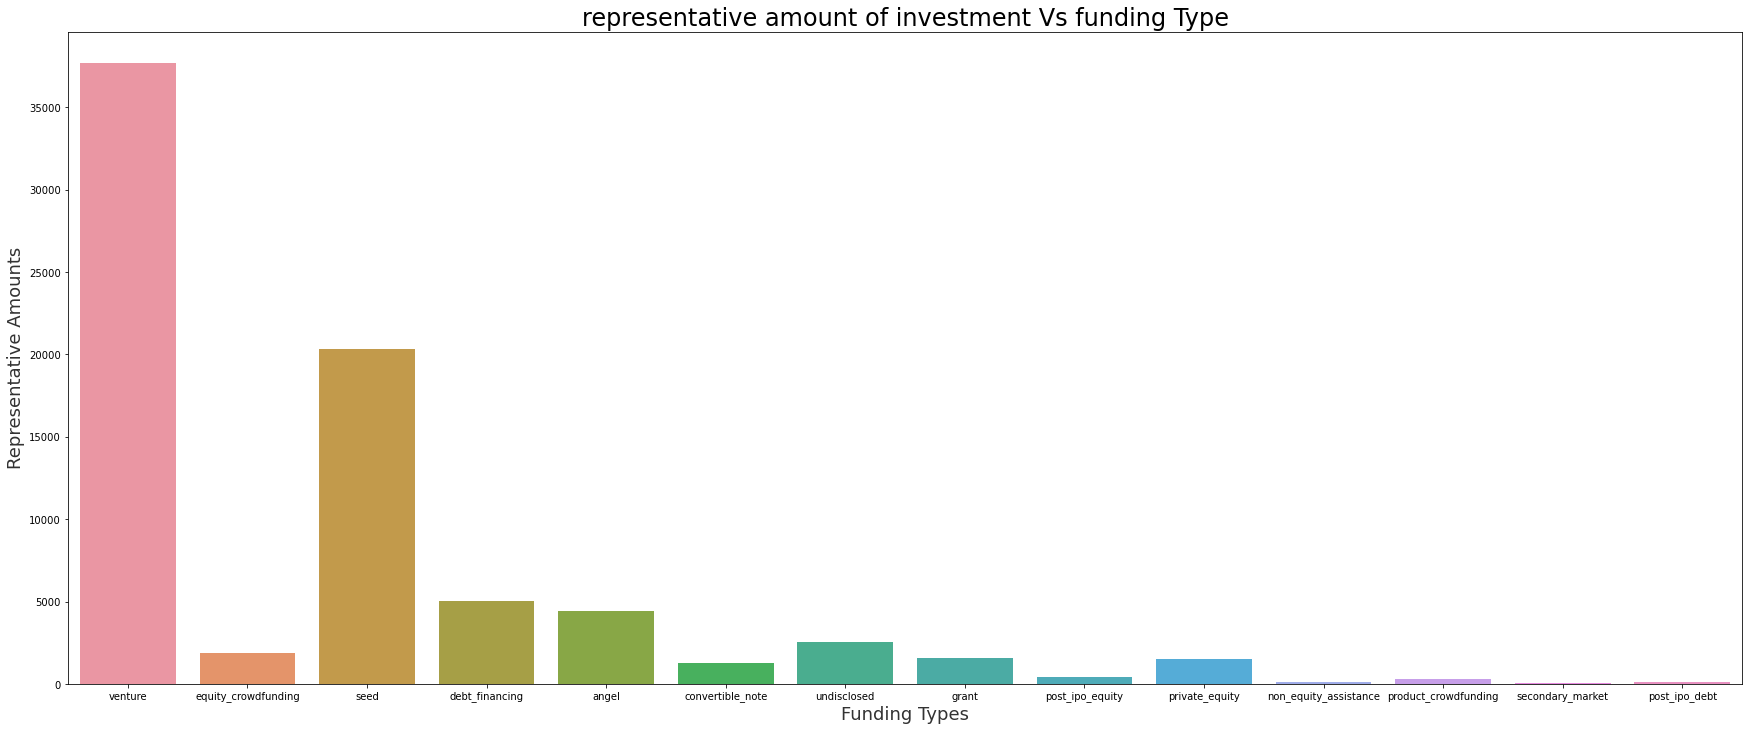

In [885]:
# A plot showing the representative amount of investment in each funding type. 
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.
plt.figure(figsize=(30,12))
ax = sns.countplot(x ='funding_round_type', data = master_frame)
ax.set_xlabel("Funding Types", fontsize=18, alpha=0.8)
ax.set_ylabel("Representative Amounts", fontsize=18, alpha=0.8)
ax.set_title("representative amount of investment Vs funding Type", fontsize=24)

plt.show()

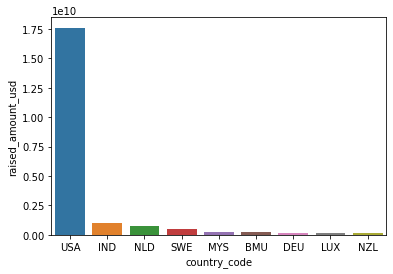

In [889]:


sns.barplot(data=top9 , x="country_code" , y='raised_amount_usd',estimator=np.median)
plt.show()

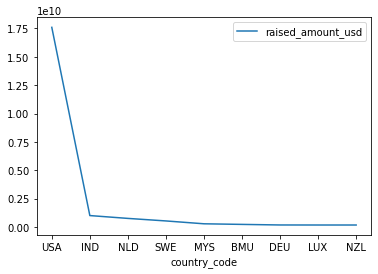

In [887]:
top9.plot(x="country_code",y="raised_amount_usd")

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

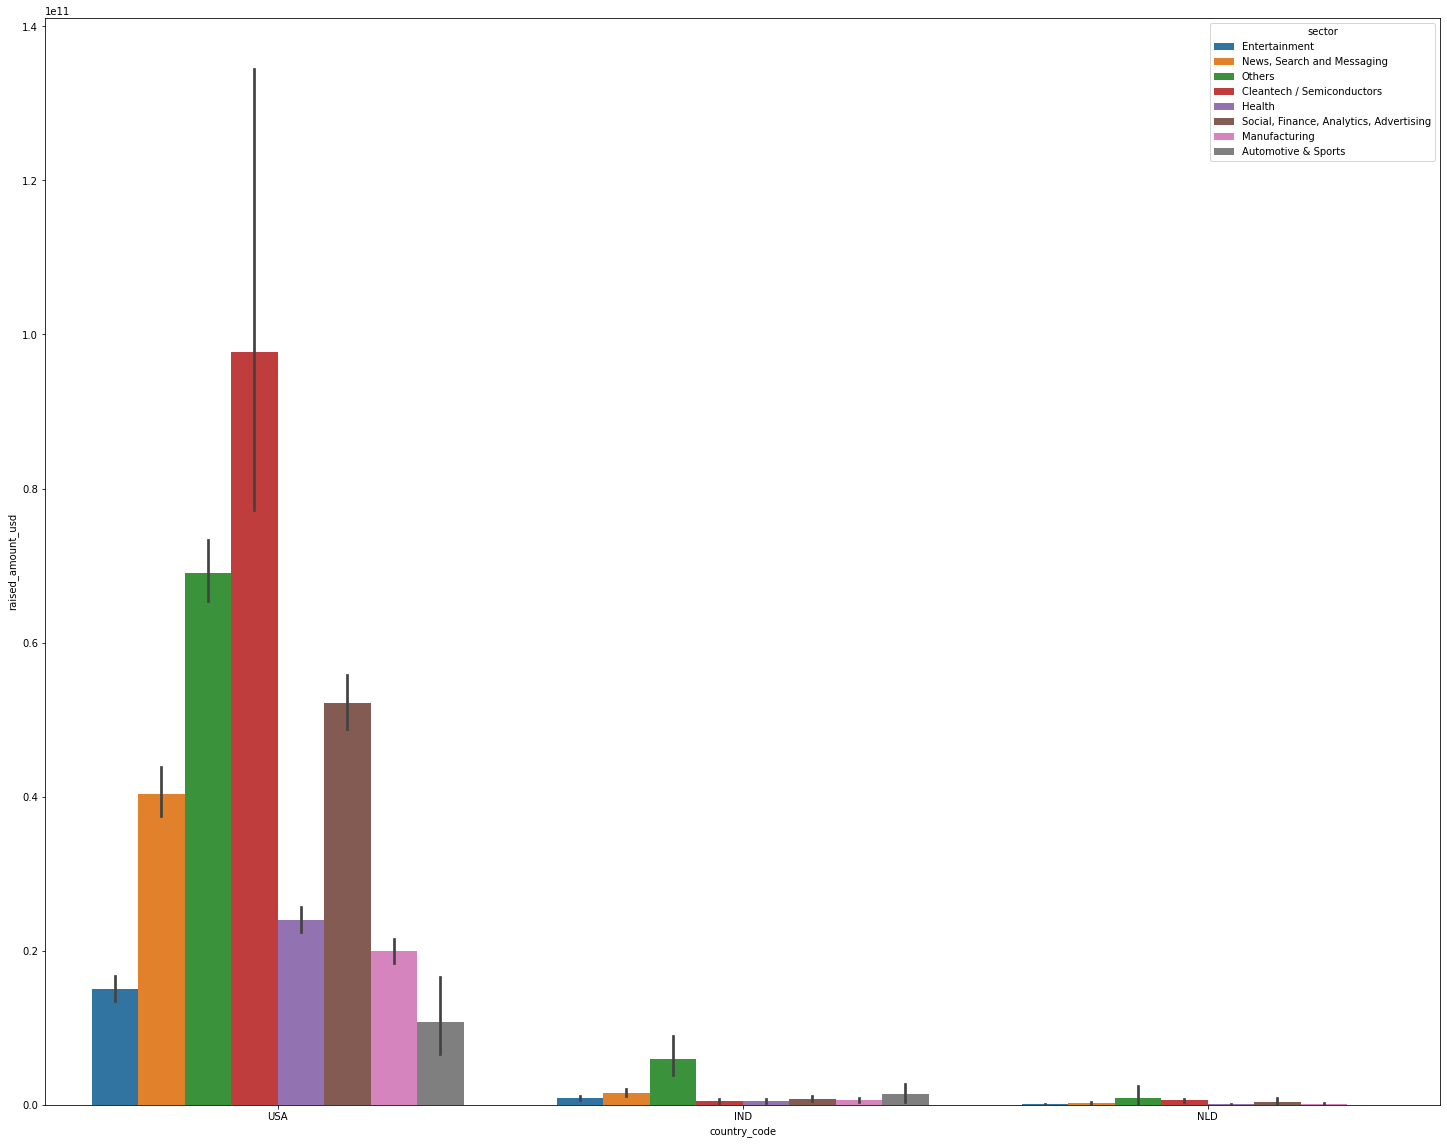

In [888]:

frames = [D1, D2, D3]
frames
result = pd.concat(frames)
result
plt.figure(figsize=(25, 20))
sns.barplot(y='raised_amount_usd', x='country_code', hue="sector", data=result, estimator=np.sum)
plt.show()